In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv(r'C:\Users\VICTUS\Desktop\mastering git\Practise git\Electricity_prediction_SLM_model\electricity_bill.csv')

In [3]:
dataset.head()

,Units_Consumed,Electricity_Bill
0,152,1010.93
1,485,3861.19
2,398,3210.64
3,320,2678.67
4,156,1239.04


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Units_Consumed    500 non-null    int64  
 1   Electricity_Bill  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [5]:
dataset.isnull().sum()

Units_Consumed      0
Electricity_Bill    0
dtype: int64

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Units_Consumed,500.0,278.46800,126.941835,51.00,177.000,277.50,391.0000,500.00
Electricity_Bill,500.0,2237.82676,1037.817674,89.18,1366.145,2251.09,3053.4425,4466.78


In [7]:
dataset.shape

(500, 2)

In [8]:
dataset.columns

Index(['Units_Consumed', 'Electricity_Bill'], dtype='object')

In [9]:
X = dataset.iloc[:,0:1]
y = dataset.iloc[:,1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 1)
(100, 1)
(400,)
(100,)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
comparision = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comparision

,Actual,Predicted
90,4173.25,3973.364793
254,3144.56,3148.420624
283,1517.69,1554.596452
445,1194.38,1314.321451
461,445.54,713.633949
...,...,...
372,2782.29,2836.063123
56,1119.93,1114.092284
440,990.37,865.808116
60,2753.77,2523.705622


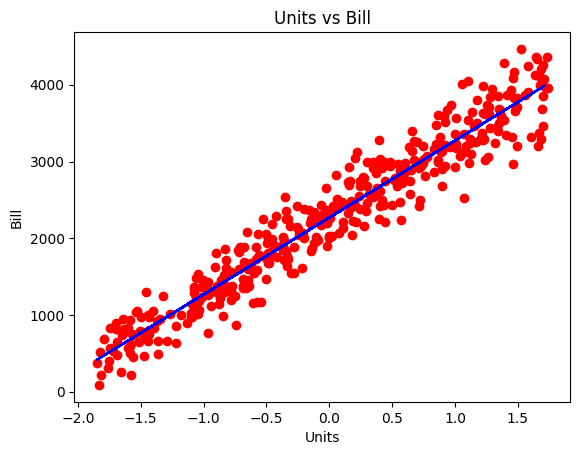

In [16]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.title('Units vs Bill')
plt.xlabel('Units')
plt.ylabel('Bill')
plt.show()

In [17]:
m = regressor.coef_
print(m)

[1002.57063941]


In [18]:
c = regressor.intercept_
print(c)

2269.935175


In [19]:
bias = regressor.score(X_train,y_train)
print(bias)

0.9347526539331132


In [20]:
variance = regressor.score(X_test,y_test)
print(variance)

0.9505310425087898


In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9505310425087898
